<center align="left"> <font size='8'>  Wine Quality Test Learning</font> </center>
<br>
<center align="left"> <font size='4'>  By Sonya </font><font size='4' color='#33AAFBD'> August 2021</font></center>
<br>

----------

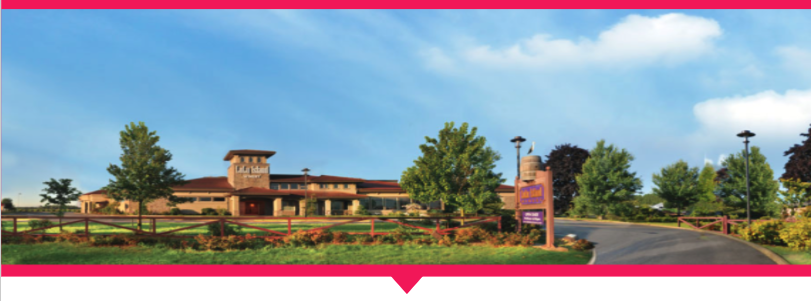

As my first learning project, I try to use multiple methods of regression and classification on the same dataset to learn more about a wide range of methods. 

Contents:

1. Import dataset
2. Process dataset
3. Data Exploration： 
    -comparison between both the Wines
    -set the quality standard
    -Proportions
4. Analysis using Linear Regression
5. Analysis using Classification

Data files from Kaggle & Lulu Island winery :
- winequality-fruit.csv 
- winequality-ice.csv 

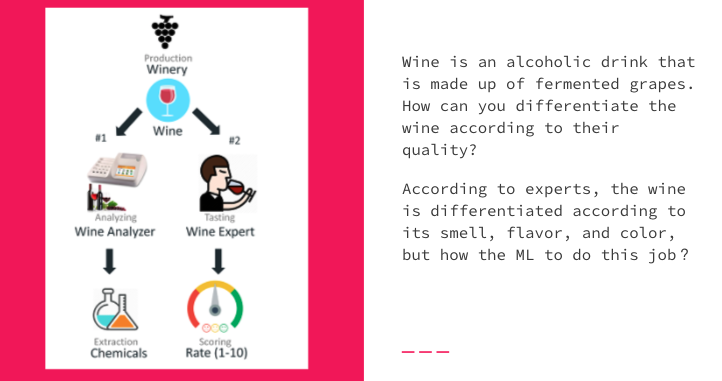

Remark: the chemicals meaning

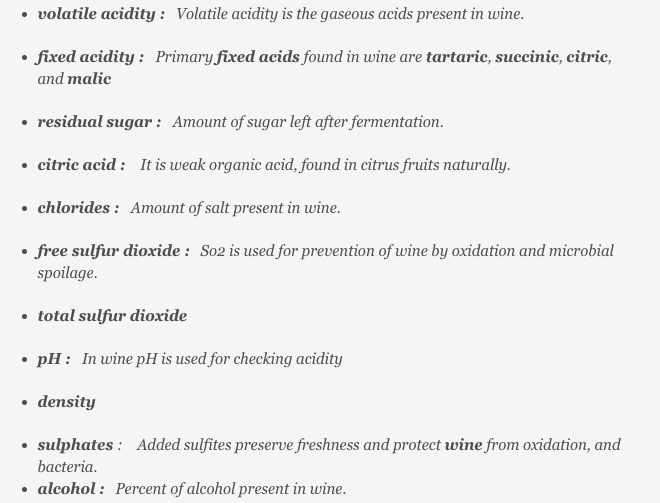

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [112]:
from sklearn import preprocessing
import os

# Import & study the dataset

The datasets are save in two files, I need to check them before decide to combine or not.

In [116]:
# raw data import

labels = ('fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar', 'chlorides',
          'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality')

df_ice = pd.read_csv('winequality-ice.csv', header=0, names=labels, sep=';')
df_fruit = pd.read_csv('winequality-fruit.csv',
                       header=0, names=labels, sep=';')

In [117]:
df_ice.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [118]:
df_fruit.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


## Dataset Info

Get an overall picture of the data info and shape of the dataset

In [119]:
df_ice.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         1599 non-null   float64
 1   volatile_acidity      1599 non-null   float64
 2   citric_acid           1599 non-null   float64
 3   residual_sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free_sulfur_dioxide   1599 non-null   float64
 6   total_sulfur_dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [120]:
df_fruit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         4898 non-null   float64
 1   volatile_acidity      4898 non-null   float64
 2   citric_acid           4898 non-null   float64
 3   residual_sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free_sulfur_dioxide   4898 non-null   float64
 6   total_sulfur_dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [121]:
# checking if that missing values in columns

df_ice.isna().sum()

fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [154]:
df_fruit.isna().sum()

fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

## Dataset Description

In [49]:
df_ice.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000
mean,8.310596,0.529478,0.272333,2.523400,0.088124,15.893304,46.825975,0.996709,3.309787,0.658705,10.432315,5.623252
std,1.736990,0.183031,0.195537,1.352314,0.049377,10.447270,33.408946,0.001869,0.155036,0.170667,1.082065,0.823578
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996700,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.430000,2.600000,0.091000,21.000000,63.000000,0.997820,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [58]:
df_fruit.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000
mean,6.839346,0.280538,0.334332,5.914819,0.045905,34.889169,137.193512,0.993790,3.195458,0.490351,10.589358,5.854835
std,0.866860,0.103437,0.122446,4.861646,0.023103,17.210021,43.129065,0.002905,0.151546,0.113523,1.217076,0.890683
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.600000,0.035000,23.000000,106.000000,0.991620,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,4.700000,0.042000,33.000000,133.000000,0.993500,3.180000,0.480000,10.400000,6.000000
75%,7.300000,0.330000,0.390000,8.900000,0.050000,45.000000,166.000000,0.995710,3.290000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


## Original Shape

In [61]:
df_ice.shape

(1599, 12)

In [62]:
df_fruit.shape

(4898, 12)

# Process Dataset

## Dropping the Duplicate Values

In [63]:
print('Ice Wine')
print('Ice wine duplicate values (Before Drop):',sum(df_ice.duplicated()))

df_ice.drop_duplicates(inplace = True)
print('After Drop:',sum(df_ice.duplicated()))

Ice Wine
Ice wine duplicate values (Before Drop): 240
After Drop: 0


In [64]:
print('Fruit Wine')
print('Fruit wine duplicate values (Before Drop):',sum(df_fruit.duplicated()))

df_fruit.drop_duplicates(inplace = True)
print('After Drop:',sum(df_fruit.duplicated()))

Fruit Wine
Fruit wine duplicate values (Before Drop): 937
After Drop: 0


In [65]:
# check new shape

df_ice.shape

(1359, 12)

In [66]:
df_fruit.shape

(3961, 12)

## Check the Unique Values

In [45]:
df_ice.nunique()

fixed_acidity            96
volatile_acidity        143
citric_acid              80
residual_sugar           91
chlorides               153
free_sulfur_dioxide      60
total_sulfur_dioxide    144
density                 436
pH                       89
sulphates                96
alcohol                  65
quality                   6
dtype: int64

In [46]:
df_fruit.nunique()

fixed_acidity            68
volatile_acidity        125
citric_acid              87
residual_sugar          310
chlorides               160
free_sulfur_dioxide     132
total_sulfur_dioxide    251
density                 890
pH                      103
sulphates                79
alcohol                 103
quality                   7
dtype: int64

In [67]:
df_fruit.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000
mean,6.839346,0.280538,0.334332,5.914819,0.045905,34.889169,137.193512,0.993790,3.195458,0.490351,10.589358,5.854835
std,0.866860,0.103437,0.122446,4.861646,0.023103,17.210021,43.129065,0.002905,0.151546,0.113523,1.217076,0.890683
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.600000,0.035000,23.000000,106.000000,0.991620,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,4.700000,0.042000,33.000000,133.000000,0.993500,3.180000,0.480000,10.400000,6.000000
75%,7.300000,0.330000,0.390000,8.900000,0.050000,45.000000,166.000000,0.995710,3.290000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


## Append the category 

Appending the wine category to each dataframe & display

In [68]:
df_ice.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5


In [69]:
df_ice['category'] = 'ice'
df_ice.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,category
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,ice
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,ice
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,ice
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,ice
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,ice


In [70]:
df_fruit['category'] = 'fruit'
df_fruit.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,category
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,fruit
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,fruit
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,fruit
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,fruit
6,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,6,fruit


## Append datasets

In [74]:
# two dataset combine

wine_df = df_ice.append(df_fruit)

wine_df.head(-5)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,category
0,7.4,0.700,0.00,1.90,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,ice
1,7.8,0.880,0.00,2.60,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,ice
2,7.8,0.760,0.04,2.30,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,ice
3,11.2,0.280,0.56,1.90,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,ice
5,7.4,0.660,0.00,1.80,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5,ice
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4888,6.8,0.220,0.36,1.20,0.052,38.0,127.0,0.99330,3.04,0.54,9.2,5,fruit
4889,4.9,0.235,0.27,11.75,0.030,34.0,118.0,0.99540,3.07,0.50,9.4,6,fruit
4890,6.1,0.340,0.29,2.20,0.036,25.0,100.0,0.98938,3.06,0.44,11.8,6,fruit
4891,5.7,0.210,0.32,0.90,0.038,38.0,121.0,0.99074,3.24,0.46,10.6,6,fruit


In [193]:
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5320 entries, 0 to 4897
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         5320 non-null   float64
 1   volatile_acidity      5320 non-null   float64
 2   citric_acid           5320 non-null   float64
 3   residual_sugar        5320 non-null   float64
 4   chlorides             5320 non-null   float64
 5   free_sulfur_dioxide   5320 non-null   float64
 6   total_sulfur_dioxide  5320 non-null   float64
 7   density               5320 non-null   float64
 8   pH                    5320 non-null   float64
 9   sulphates             5320 non-null   float64
 10  alcohol               5320 non-null   float64
 11  quality               5320 non-null   int64  
 12  category              5320 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 741.9+ KB


In [111]:
# output the edited dataset and save for worklog

outputpath='/Users/sonyaWU/Desktop/wine_quality_1.xlsx'
wine_df.to_excel(outputpath,index=False,header=True)

# Data Exploration & Visualization

## Visualization for explaining the data

In [75]:
#check the higher quality

wine_df.groupby(['category'])['quality'].mean()

category
fruit    5.854835
ice      5.623252
Name: quality, dtype: float64

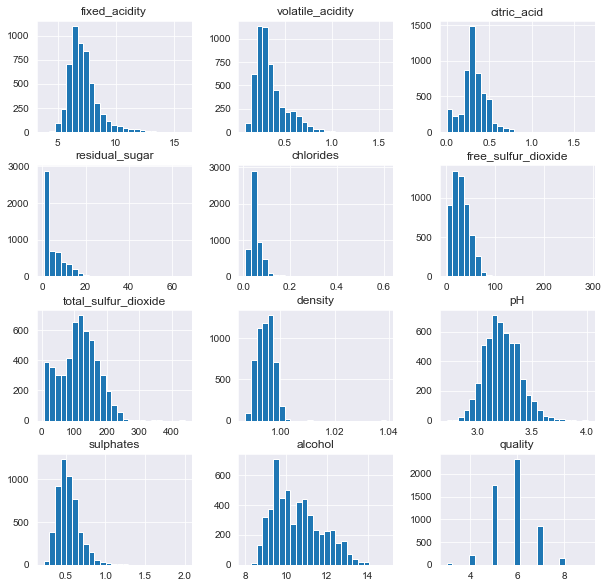

In [122]:
# display histogram, how data distribute on features

wine_df.hist(bins=25, figsize=(10,10))
plt.show()

Text(0, 0.5, 'alcohol')

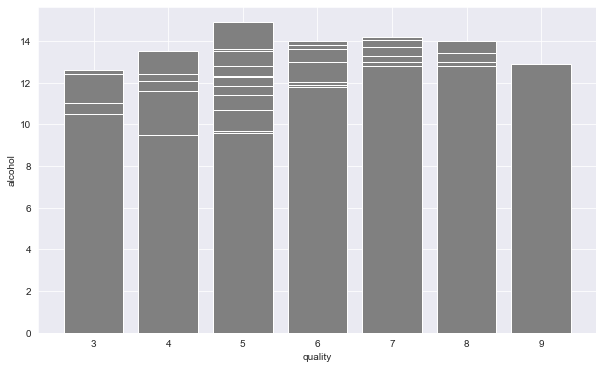

In [126]:
# plot bar graph, what value of alcohol make changes in quality

plt.figure(figsize=[10, 6])

plt.bar(wine_df['quality'], wine_df['alcohol'], color='gray')
plt.xlabel('quality')
plt.ylabel('alcohol')

## Correlation Matrix for Quality

How many features are correlate to each other?

Text(0.5, 1.0, 'Correlation Matrix of both wines Quality')

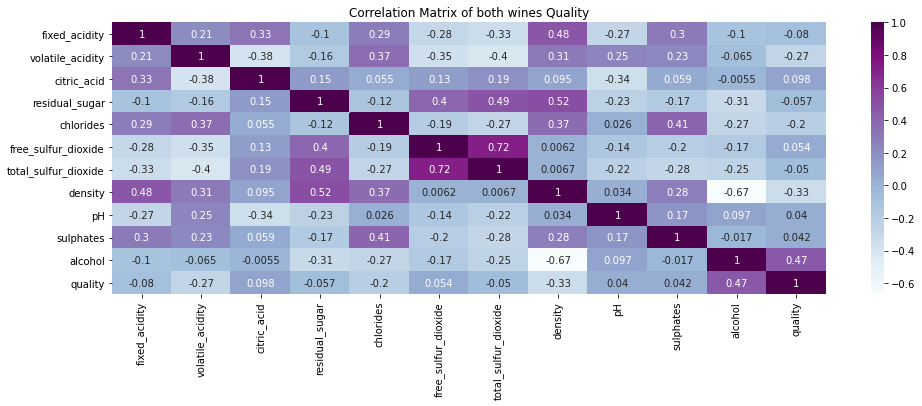

In [82]:
#plot heatmap

plt.figure(figsize=(16, 5))
sns.heatmap(wine_df.corr(), annot=True, cmap="BuPu")
plt.title('Correlation Matrix of both wines Quality')

Text(0.5, 1.0, 'Correlation Matrix of Ice_wine Quality)')

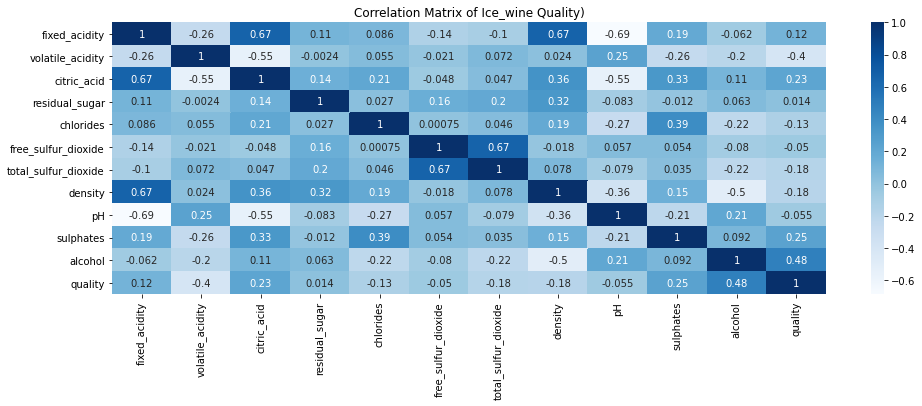

In [83]:
plt.figure(figsize=(16, 5))
sns.heatmap(df_ice.corr(), annot=True, cmap="Blues")
plt.title('Correlation Matrix of Ice_wine Quality)')

Text(0.5, 1.0, 'Correlation Matrix of Fruit_wine Quality)')

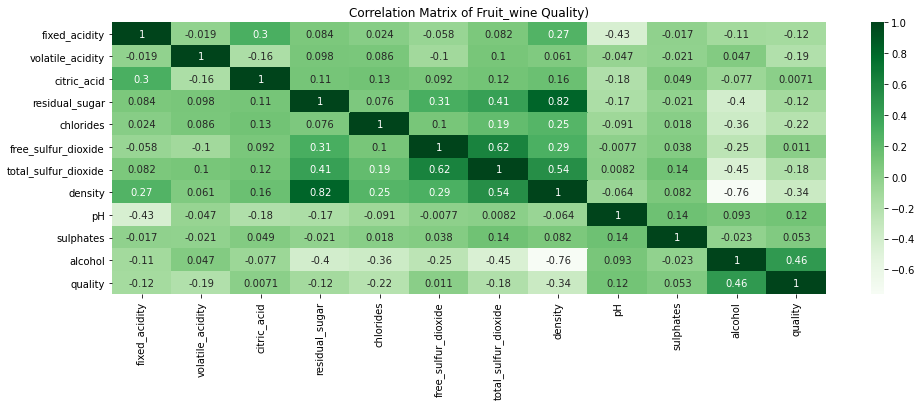

In [84]:
plt.figure(figsize=(16, 5))
sns.heatmap(df_fruit.corr(), annot=True, cmap="Greens")
plt.title('Correlation Matrix of Fruit_wine Quality)')

Compare these three charts, we can see **Sulfur dioxide** is highly correlated with the Quality of a wine. And followed by **Density & Alcohol**.

For further, find those features are fully correlated to each other by reducing the number of features from the data. Relationship among them is equally impact on model,and need to delete one.

In [134]:
# set the correlation number greater than 0.7
for a in range(len(wine_df.corr().columns)):
    for b in range(a):
        if abs(wine_df.corr().iloc[a, b]) > 0.7:
            name = wine_df.corr().columns[a]
            print(name)

total_sulfur_dioxide


In [136]:
# the feature has correlation value above 0.7 considered as a fully correlated
df2 = wine_df.drop('total_sulfur_dioxide', axis=1)

Good amount of multicollinearity, which could be potentially taken care of by using regression method.

In [138]:
df2.isnull().sum()

fixed_acidity          0
volatile_acidity       0
citric_acid            0
residual_sugar         0
chlorides              0
free_sulfur_dioxide    0
density                0
pH                     0
sulphates              0
alcohol                0
quality                0
category               0
dtype: int64

## Set the number of wines by Quality standards

/Users/sonyaWU/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='quality', ylabel='count'>

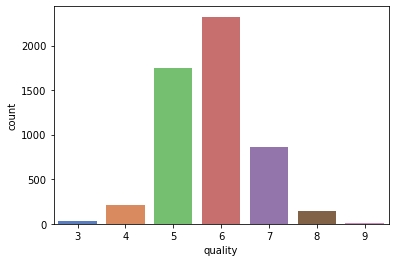

In [87]:
sns.countplot(wine_df["quality"], palette="muted")

**Set Wine Quality Standards Level:**

3,4 = Low

5,6 = Medium

7,8,9 = High

In [88]:
quality = wine_df["quality"].values
category = []
for num in quality:
    if num < 5:
        category.append("Low")
    elif num > 6:
        category.append("High")
    else:
        category.append("Medium")

[('High', 1009), ('Medium', 4075), ('Low', 236)]


/Users/sonyaWU/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='count'>

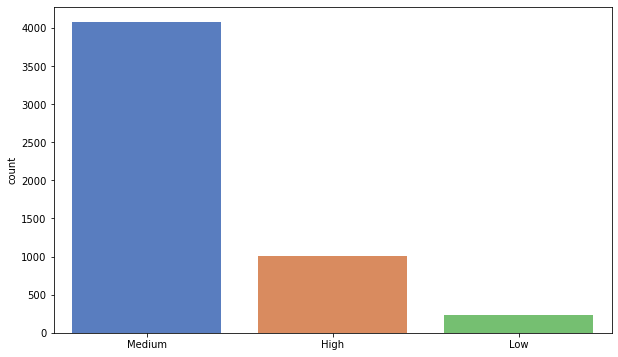

In [89]:
print([(i, category.count(i)) for i in set(category)])
plt.figure(figsize=(10, 6))
sns.countplot(category, palette="muted")

## Proportions

In [90]:
sns.set_style('darkgrid')

# counts for each rating and category
category_counts = wine_df.groupby(['category', 'quality']).count()['pH']

# total counts for each category
category_totals = wine_df.groupby('category').count()['pH']

In [91]:
# proportions by dividing ice rating counts by total # of ice wine samples
ice_proportions = category_counts['ice'] / category_totals['ice']

# proportions by dividing fruit rating counts by total # of fruit wine samples
fruit_proportions = category_counts['fruit'] / category_totals['fruit']


ice_proportions['9'] = 0

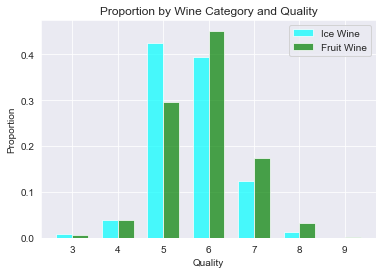

In [93]:
ind = np.arange(len(ice_proportions))
width = 0.35

# plot bars
ice_bars = plt.bar(ind, ice_proportions, width,
                   color='cyan', alpha=.7, label='Ice Wine')
fruit_bars = plt.bar(ind + width, fruit_proportions, width,
                     color='green', alpha=.7, label='Fruit Wine')

# title and labels
plt.ylabel('Proportion')
plt.xlabel('Quality')
plt.title('Proportion by Wine Category and Quality')
locations = ind + width / 2  # xtick locations
labels = ['3', '4', '5', '6', '7', '8', '9']  # xtick labels
plt.xticks(locations, labels)


plt.legend()

# Test & Predict 

## Using Linear Regression

In [94]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [203]:
correlations =df_ice.corr()['quality'].drop('quality')
print(correlations)

fixed_acidity           0.124052
volatile_acidity       -0.390558
citric_acid             0.226373
residual_sugar          0.013732
chlorides              -0.128907
free_sulfur_dioxide    -0.050656
total_sulfur_dioxide   -0.185100
density                -0.174919
pH                     -0.057731
sulphates               0.251397
alcohol                 0.476166
Name: quality, dtype: float64


In [204]:
def get_features(correlation_threshold):
    max_corrs = correlations.abs()
    high_correaltions = max_corrs
    high_correaltions = max_corrs[max_corrs >
                                  correlation_threshold].index.values.tolist()

    return high_correaltions

In [205]:
features = get_features(0.1)
print(features)

['fixed_acidity', 'volatile_acidity', 'citric_acid', 'chlorides', 'total_sulfur_dioxide', 'density', 'sulphates', 'alcohol']


### Splitting into Train and Test sets

Using the df_ice for testing

In [206]:
X = df_ice[features]
y = df_ice['quality']

In [207]:
X.head()

,fixed_acidity,volatile_acidity,citric_acid,chlorides,total_sulfur_dioxide,density,sulphates,alcohol
0,7.4,0.70,0.00,0.076,34.0,0.9978,0.56,9.4
1,7.8,0.88,0.00,0.098,67.0,0.9968,0.68,9.8
2,7.8,0.76,0.04,0.092,54.0,0.9970,0.65,9.8
3,11.2,0.28,0.56,0.075,60.0,0.9980,0.58,9.8
4,7.4,0.70,0.00,0.076,34.0,0.9978,0.56,9.4


In [208]:
y.head()

0    5
1    5
2    5
3    6
4    5
Name: quality, dtype: int64

In [101]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=tate=ate=0)

In [186]:
lr = LinearRegression()
lr.fit(X_train, y_train)

print(lr.coef_)

[ 5.30906708e-02 -1.14753018e+00 -2.11108869e-01 -1.29204524e+00
 -1.85560837e-03 -2.13219078e+01  8.76361039e-01  2.73637689e-01]


### Predict

In [187]:
train_pred = lr.predict(X_train)
print(train_pred)

test_pred = lr.predict(X_test)
print(test_pred)

[5.98505048 6.4088323  6.36857297 ... 5.33269369 5.96392913 4.82382945]
[6.24770409 6.43414987 5.13728874 5.38292553 4.84548678 6.33800203
 5.03360286 5.2599783  5.14066885 4.65620659 5.54335864 5.43969893
 5.21329837 4.74962036 6.06592045 4.91699198 4.81715957 5.62684658
 5.1782459  4.92029431 5.09504987 5.28294344 6.00066232 5.29475068
 5.6109902  5.44382949 5.56724145 5.30441704 5.09276174 5.62882974
 5.37647162 5.39494314 5.26071852 6.17246176 5.38224327 5.10344436
 5.08696082 5.43968469 6.23963379 6.47713189 5.95691837 6.12587633
 5.28260722 5.93244303 5.27398981 4.87284707 4.98085939 5.34061252
 5.40824121 4.39038521 5.90115799 5.60842316 6.29039214 5.30136319
 6.46947552 5.49443297 5.54397199 5.67333981 4.82294331 6.16422367
 5.7224733  5.39933357 5.06937637 4.83213184 6.75563184 5.9837795
 5.60364437 5.4054826  5.16128907 5.39120433 6.37787865 6.07704418
 6.2229522  6.41332894 5.61758145 5.46305922 5.15443762 5.29763703
 5.39730743 5.46516271 4.9546238  6.16432468 5.76790396 5.

In [188]:
rmse_train = metrics.mean_squared_error(train_pred, y_train) ** 0.5
print(rmse_train)

rmse_test = metrics.mean_squared_error(test_pred, y_test) ** 0.5
print(rmse_test)

0.6568100876138747
0.6667707940960182


In [189]:
predicted_data = np.round_(test_pred)
print(predicted_data)

[6. 6. 5. 5. 5. 6. 5. 5. 5. 5. 6. 5. 5. 5. 6. 5. 5. 6. 5. 5. 5. 5. 6. 5.
 6. 5. 6. 5. 5. 6. 5. 5. 5. 6. 5. 5. 5. 5. 6. 6. 6. 6. 5. 6. 5. 5. 5. 5.
 5. 4. 6. 6. 6. 5. 6. 5. 6. 6. 5. 6. 6. 5. 5. 5. 7. 6. 6. 5. 5. 5. 6. 6.
 6. 6. 6. 5. 5. 5. 5. 5. 5. 6. 6. 6. 6. 7. 6. 6. 6. 6. 5. 5. 5. 6. 5. 6.
 6. 6. 6. 5. 6. 5. 6. 5. 5. 5. 6. 6. 6. 6. 7. 6. 6. 6. 5. 6. 5. 6. 6. 6.
 5. 5. 5. 6. 6. 5. 6. 6. 6. 5. 6. 6. 5. 6. 6. 5. 6. 5. 5. 5. 6. 6. 6. 6.
 5. 6. 6. 7. 6. 6. 5. 5. 6. 6. 6. 5. 6. 5. 6. 6. 6. 6. 5. 6. 6. 7. 6. 5.
 6. 5. 6. 5. 6. 6. 6. 6. 6. 6. 5. 6. 5. 7. 6. 5. 6. 5. 6. 5. 5. 6. 6. 6.
 5. 6. 6. 6. 6. 5. 5. 5. 6. 6. 5. 5. 5. 5. 6. 5. 6. 7. 6. 5. 6. 6. 5. 6.
 6. 6. 6. 6. 6. 6. 5. 6. 5. 6. 5. 6. 6. 5. 5. 7. 5. 6. 6. 5. 5. 5. 6. 7.
 6. 6. 5. 5. 6. 5. 6. 5. 5. 6. 6. 5. 6. 6. 5. 5. 6. 6. 5. 5. 5. 6. 5. 6.
 5. 6. 7. 6. 5. 6. 5. 5.]


In [190]:
print('Mean Absolute Error:', metrics.mean_absolute_error(test_pred, y_test))
print('Mean Squared Error:', metrics.mean_squared_error(test_pred, y_test))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(test_pred, y_test)))

Mean Absolute Error: 0.5327418793324455
Mean Squared Error: 0.44458329185943474
Root Mean Squared Error: 0.6667707940960182


In [209]:
coefficients = pd.DataFrame(lr.coef_, features) 
coefficients.columns = ['Coefficient']
print(coefficients)

                      Coefficient
fixed_acidity            0.053091
volatile_acidity        -1.147530
citric_acid             -0.211109
chlorides               -1.292045
total_sulfur_dioxide    -0.001856
density                -21.321908
sulphates                0.876361
alcohol                  0.273638


In [210]:
from sklearn.linear_model import LinearRegression
clf= LinearRegression().fit(X_train,y_train)
clf.score(X_train,y_train)

0.35014971683618445

Try in dataset just for df_ice, or df_fruit, result is differenc.
The above coefficients denote the impact of each on the quality of wine.

1. Every Alcohol measure increase will lead to increase of 0.33 in quality.
2. The Chlorides increasing will be decrease the quality.

## Random Forest Classifier

Using df2

In [143]:
# catogerical vars
df3=pd.get_dummies(df2,drop_first=True)
df3

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,density,pH,sulphates,alcohol,quality,category_ice
0,7.4,0.70,0.00,1.9,0.076,11.0,0.99780,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,0.99680,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,0.99700,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,0.99800,3.16,0.58,9.8,6,1
5,7.4,0.66,0.00,1.8,0.075,13.0,0.99780,3.51,0.56,9.4,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,0.99114,3.27,0.50,11.2,6,0
4894,6.6,0.32,0.36,8.0,0.047,57.0,0.99490,3.15,0.46,9.6,5,0
4895,6.5,0.24,0.19,1.2,0.041,30.0,0.99254,2.99,0.46,9.4,6,0
4896,5.5,0.29,0.30,1.1,0.022,20.0,0.98869,3.34,0.38,12.8,7,0


### Splitting dataset

In [149]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=40)

In [150]:
from sklearn.preprocessing import MinMaxScaler

# creating normalization object
norm = MinMaxScaler()

norm_fit = norm.fit(X_train)
new_xtrain = norm_fit.transform(X_train)
new_xtest = norm_fit.transform(X_test)


print(new_xtrain)

[[0.48672566 0.17948718 0.34       ... 0.49632893 0.19161677 0.33846154]
 [0.37168142 0.12820513 0.4        ... 0.44566814 0.2754491  0.52307692]
 [0.48672566 0.12820513 0.35       ... 0.48825257 0.2994012  0.43076923]
 ...
 [0.28318584 0.35897436 0.02       ... 0.49412628 0.14371257 0.16923077]
 [0.54867257 0.13675214 0.44       ... 0.61894273 0.26946108 0.24615385]
 [0.17699115 0.48290598 0.2        ... 0.56020558 0.1257485  0.12307692]]


### Apply model 

In [152]:
# importing modules
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

In [156]:
f = RandomForestClassifier()
f.fit(X_train, y_train)
g = f.predict(X_test)
print("Accuracy for RandomForestClassifier:",
      metrics.accuracy_score(y_test, g))

Accuracy for RandomForestClassifier: 0.5588235294117647


In [211]:
from sklearn.metrics import mean_squared_error
a=clf.predict(X_train)
train_rmse= (mean_squared_error(a,y_train)) ** 0.5
print(train_rmse)
b=clf.predict(X_test)
test_rmse= (mean_squared_error(b,y_test)) ** 0.5
test_rmse

0.6568100876138747


0.6667707940960182

In [212]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
knn=KNeighborsClassifier(n_neighbors=80)
knn.fit(X_train,y_train)
g=knn.predict(X_test)
metrics.accuracy_score(y_test,g)
metrics.f1_score(y_test,g,average="micro")

0.4375

In [213]:
from sklearn import svm
SV=svm.SVC(C=1,kernel='rbf')
SV.fit(X_train,y_train)
g=SV.predict(X_test)
metrics.accuracy_score(y_test,g)
metrics.f1_score(y_test,g,average="micro")

0.47058823529411764

In [214]:
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()
nb.fit(X_train,y_train)
g=nb.predict(X_test)
metrics.accuracy_score(y_test,g)
metrics.f1_score(y_test,g,average="micro")

0.5294117647058824

In [215]:
from sklearn.tree import DecisionTreeClassifier
f= DecisionTreeClassifier()
f.fit(X_train,y_train)
g=f.predict(X_test)
print(metrics.accuracy_score(y_test,g))
print(metrics.f1_score(y_test,g,average="micro"))

0.4852941176470588
0.4852941176470588


It shows a massive increase in accuracy when we reduced the number of classes while still managing to retain meaning of the output.

Random Forest Classifier gives the 88% accuracy

Not finish yet...